<a href="https://colab.research.google.com/github/YB-Sung/DXIC_Lab_09_ML5_SVM-for-Classification/blob/main/SVM_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ LG전자 H&A DX Intensive Course - Support Vector Machine ]

SVM을 활용한 Classification

**진행 순서**
1. Dataset 생성
2. Dataset EDA
3. SVM 모델 생성
4. SVM 모델 학습 및 평가
5. SVM 모델 하이퍼파라미터 튜닝 및 평가
6. Baseline 모델 학습 및 평가
7. 성능 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# 1. Dataset 생성

In [ ]:
# Create a dataset with 5 columns and 5000 rows
X, y = make_classification(
    n_samples    = 5000,
    n_features   = 5,
    n_informative= 3,
    n_redundant  = 2,
    n_repeated   = 0,
    n_classes    = 2,
    random_state = 0,
    shuffle      = False
)

# Print the shape of the dataset
print(X.shape)
print(y.shape)


(5000, 5)
(5000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Trainset: ',X_train.shape)
print('Testset: ',X_test.shape)

Trainset:  (3500, 5)
Testset:  (1500, 5)


# 2. Dataset EDA

In [ ]:
# Convert X_train and y_train to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=["Target"])

In [ ]:
# Print basic statistics of X_train_df
print("X_train statistics:")
X_train_df.describe()

X_train statistics:


,0,1,2,3,4
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,-0.017252,0.492479,0.043225,0.101455,-0.326425
std,1.588142,1.334232,1.267033,0.996772,1.972532
min,-5.039688,-4.414365,-3.970796,-3.637161,-7.883961
25%,-1.173990,-0.352918,-0.984904,-0.565988,-1.603001
50%,-0.290247,0.672040,0.099939,0.241577,-0.060395
75%,1.007631,1.389894,1.050462,0.771305,0.900547
max,6.733654,5.336190,3.840617,4.143140,5.967857


<Axes: xlabel='Target', ylabel='count'>

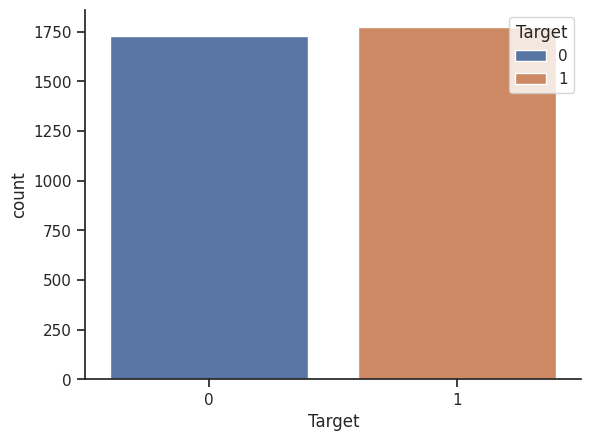

In [ ]:
# Visualize distribution of target variable
sns.countplot(x="Target", hue="Target", data=y_train_df)

<Axes: >

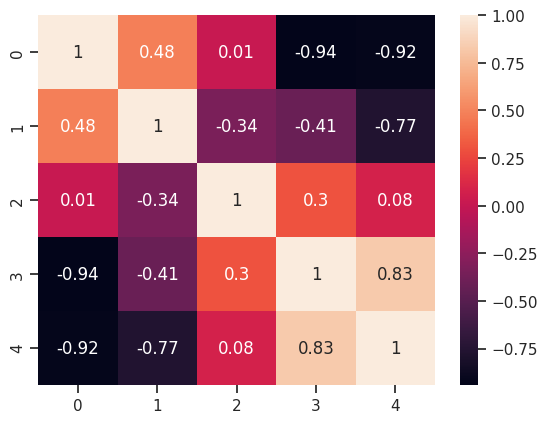

In [ ]:
# Visualize correlation matrix of X_train_df
sns.heatmap(np.round(X_train_df.corr(), 2), annot=True)

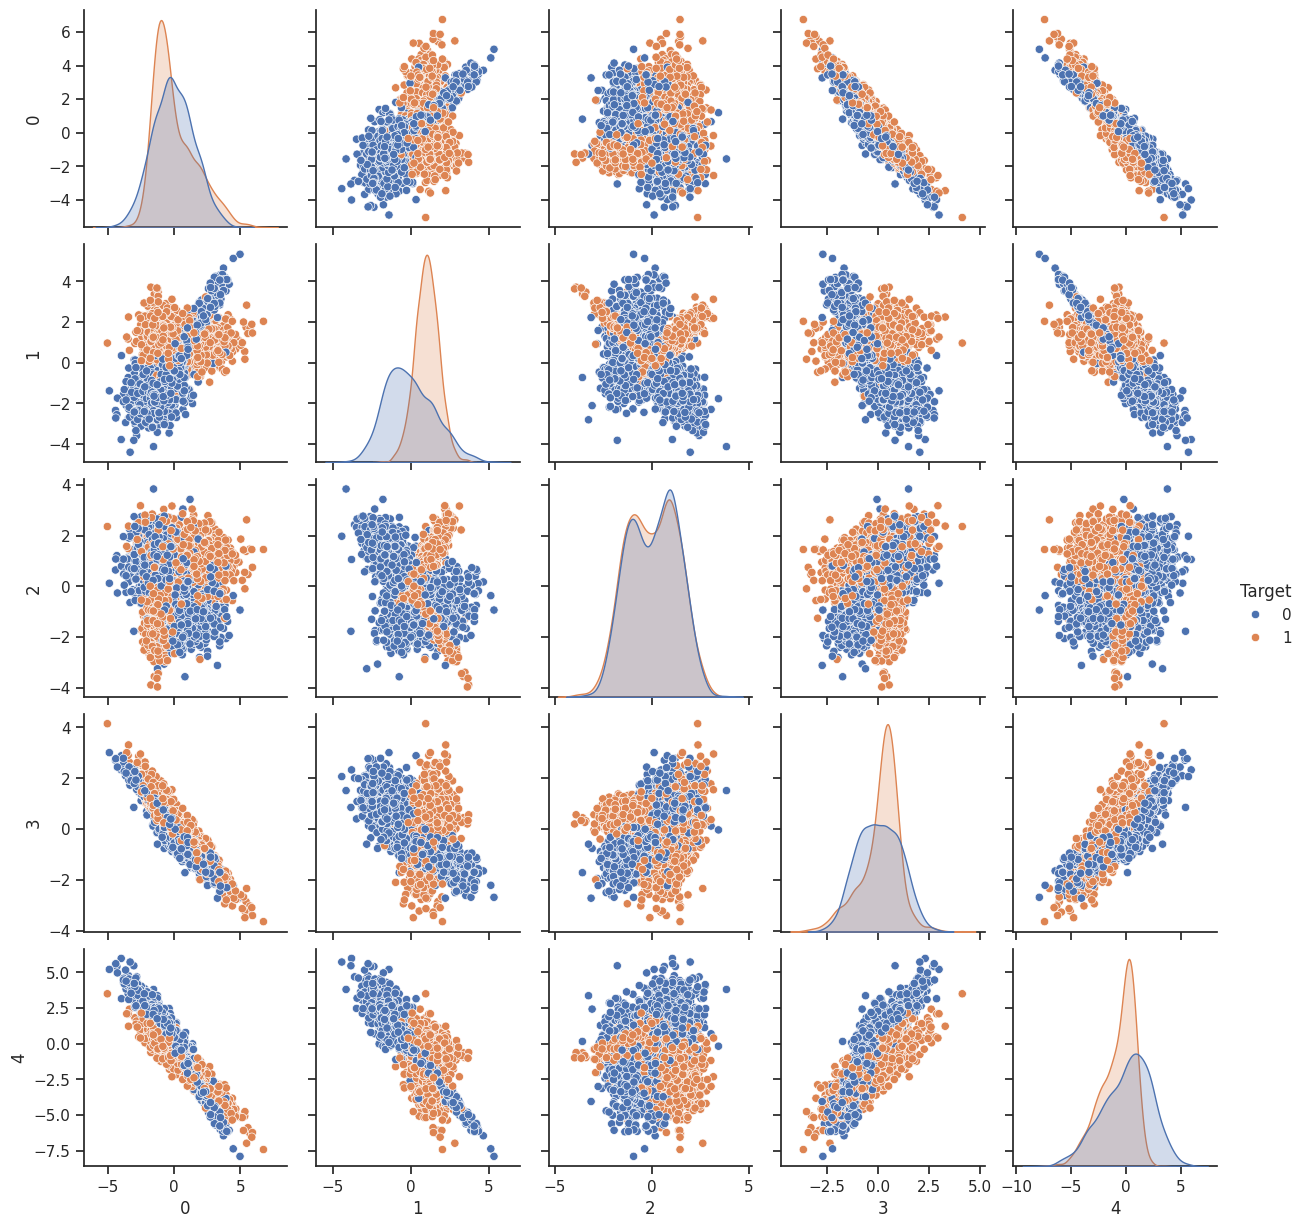

In [ ]:
train_df = pd.concat([X_train_df, y_train_df], axis=1)
sns.pairplot(train_df, hue='Target', diag_kind='kde')
plt.show()

# 3. SVM 모델 생성

In [ ]:
# Create an SVM model for classification
model = SVC()

# 4. SVM 모델 학습 및 평가

In [ ]:
model.fit(X_train, y_train)

SVC()

## 4.1 모델 평가

**사용 평가 지표**
1. F1-Score
2. Recall
3. Precision
4. Accuracy
5. AUROC


<p align="center">
  <img width="800" src="https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format">
  <br><strong>Confusioin matrix.</strong></br>
  <br>
</p>

<p align="center">
  <img width="500" src="https://velog.velcdn.com/images/zxxzx1515/post/a1114a22-b77a-4325-a02d-cb41ab079312/image.png">
  <br><strong>AUROC.</strong></br>
  <br>
</p>


In [ ]:
def calc_metrics(y_true: np.ndarray, y_pred: np.ndarray):
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)

    return {
        "F1 Score"  : round(f1,4),
        "Recall"    : round(recall,4),
        "Precision" : round(precision,4),
        "Accuracy"  : round(accuracy,4),
        "AUROC"     : round(auc_roc,4)
    }

def show_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

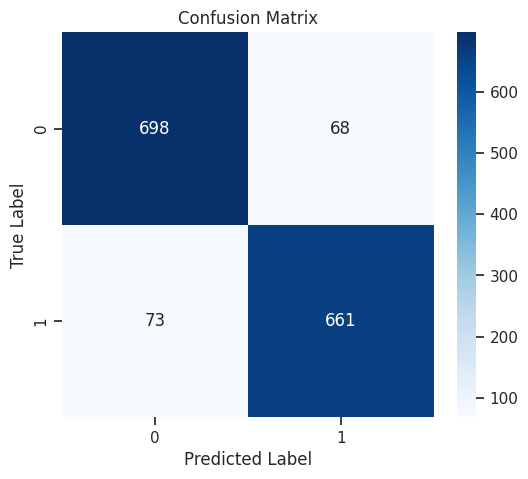

Default SVC: 
F1 Score  : 0.9036
Recall    : 0.9005
Precision : 0.9067
Accuracy  : 0.9060
AUROC     : 0.9059


In [ ]:
# Evaluate the trained SVC model on the test set
y_pred = model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Default SVC: ')
svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

# 5. SVM 모델 하이퍼파라미터 튜닝 및 평가

SVC hyper-parameters: [sklearn's documentation - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

GridSearchCV: [sklearn's documentation - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

RandomizedSearchCV: [sklearn's documentation - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

![search](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbiSBu%2FbtqF3T0FGSi%2FvnJ5vH9oANNJL2SFdZTrA0%2Fimg.png)

## Cross Validation


<p align="center">
  <img width="500" src="https://scikit-learn.org/stable/_images/grid_search_workflow.png">
  <br><strong>Cross validation workflow in model training.</strong></br>
  <br>
</p>

<p align="center">
  <img width="700" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">
  <br><strong>k-fold cross validation.</strong></br>
</p>

In [ ]:
# Define a list of parameters to tune
parameters = [
    {
        "kernel" : ["linear"],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["poly"],
        "degree" : [2, 3],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["rbf"],
        "gamma"  : [0.1, 0.01, 0.001],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["sigmoid"],
        "C"      : [0.1, 1, 10]
    },
]

# Perform grid search with cross-validation
model = SVC()
grid_search = GridSearchCV(
    estimator  = model,
    param_grid = parameters,
    cv         = 5,
    scoring    = 'accuracy',
    n_jobs     = -1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['sigmoid']}],
             scoring='accuracy')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.81122861, 1.22625008, 2.58472991, 0.25532141, 0.4044035 ,
        0.22083988, 0.68804331, 0.48494062, 1.82117252, 0.21288066,
        0.39955697, 0.55405068, 0.1667501 , 0.26125493, 0.45310779,
        0.25702705, 0.39629693, 0.55054283, 0.52932091, 0.4043539 ,
        0.3738265 ]),
 'std_fit_time': array([0.27643752, 0.18297024, 0.16740465, 0.00878157, 0.02446577,
        0.00618247, 0.10575605, 0.06077855, 0.42560096, 0.00293173,
        0.00601329, 0.01251957, 0.00620445, 0.00561529, 0.01426444,
        0.04396761, 0.0302924 , 0.10029492, 0.11087319, 0.01162624,
        0.01571383]),
 'mean_score_time': array([0.10563879, 0.10034118, 0.05424223, 0.04986629, 0.0631371 ,
        0.04853578, 0.05139923, 0.06258593, 0.03689103, 0.08609118,
        0.15159202, 0.204462  , 0.06241546, 0.1041657 , 0.17901583,
        0.07182264, 0.11967769, 0.15494099, 0.0960393 , 0.08570862,
        0.0710094 ]),
 'std_score_time': array([0.02873753, 0.01063448, 0.00356804, 0.00

In [ ]:
# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Create a DataFrame to store the results
df_results = pd.DataFrame(results)

# Select the relevant columns
df_results = df_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Rename the columns
df_results.columns = ['Hyper-parameters', 'Mean Test Score', 'Standard deviation', 'Rank']

# Print the DataFrame
df_results

,Hyper-parameters,Mean Test Score,Standard deviation,Rank
0,"{'C': 0.1, 'kernel': 'linear'}",0.728286,0.022989,17
1,"{'C': 1, 'kernel': 'linear'}",0.728857,0.024166,15
2,"{'C': 10, 'kernel': 'linear'}",0.728857,0.024166,15
3,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.816286,0.009630,10
4,"{'C': 0.1, 'degree': 3, 'kernel': 'poly'}",0.768857,0.010474,13
5,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.832571,0.009790,8
6,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.821143,0.011549,9
7,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.838000,0.013328,7
8,"{'C': 10, 'degree': 3, 'kernel': 'poly'}",0.851143,0.008685,6
9,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.889714,0.014269,3


Best GridSearch parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


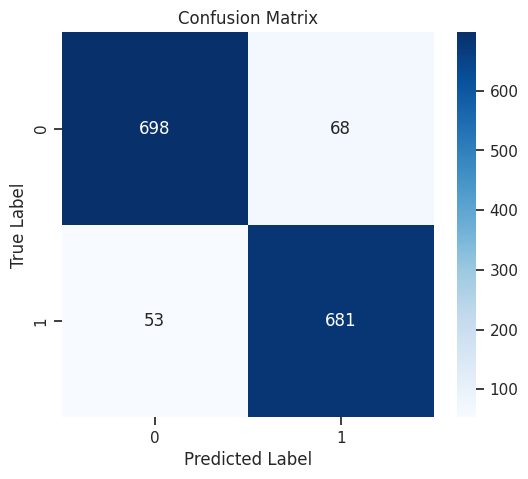

Best SVC: 
F1 Score  : 0.9184
Recall    : 0.9278
Precision : 0.9092
Accuracy  : 0.9193
AUROC     : 0.9195


In [ ]:
# Print the best parameters and score
print("Best GridSearch parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_grid_model = grid_search.best_estimator_
y_pred = best_grid_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Best SVC: ')
best_grid_svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in best_grid_svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

In [ ]:
distributions = [
    {
        "kernel" : ["linear"],
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["poly"],
        "degree" : stats.randint(low=0, high=5),
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["rbf"],
        "gamma"  : stats.uniform(loc=0, scale=0.1),
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["sigmoid"],
        "C"      : stats.uniform(loc=0, scale=10)
    },
]

# Perform randomized search with cross-validation
model = SVC(random_state=42)
random_search = RandomizedSearchCV(
    estimator           = model,
    param_distributions = distributions,
    n_iter              = 10,
    scoring             = 'accuracy',
    random_state        = 42,
    n_jobs              = -1
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5656ead810>,
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a565704df30>,
                                         'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a565718...
                                         'kernel': ['poly']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5656ed7e20>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a56568aad40>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a56568aa980>,
                                         'kernel': ['sigmoid']}],
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.cv_results_

{'mean_fit_time': array([0.20158629, 0.3939898 , 0.21751509, 0.17363191, 0.38929539,
        3.05506582, 0.37727094, 0.32179527, 1.26139398, 0.42315068]),
 'std_fit_time': array([0.00850603, 0.02435068, 0.00653601, 0.0032164 , 0.01872413,
        0.69287333, 0.02045106, 0.02054258, 0.04515174, 0.05249569]),
 'mean_score_time': array([0.08055387, 0.08132868, 0.08732038, 0.05787368, 0.0785161 ,
        0.0598886 , 0.07721815, 0.05318198, 0.05621839, 0.09483705]),
 'std_score_time': array([0.00841214, 0.00377431, 0.00893228, 0.00318915, 0.00405232,
        0.00733816, 0.0033332 , 0.00964262, 0.00207294, 0.01297919]),
 'param_C': masked_array(data=[7.965429868602328, 5.986584841970366,
                    4.458327528535912, 8.661761457749352,
                    6.508884729488528, 9.699098521619943,
                    9.385527090157503, 1.8182496720710062,
                    3.0424224295953772, 0.07066305219717406],
              mask=[False, False, False, False, False, False, False, Fal

In [ ]:
# Extract the results from the RandomizedSearchCV object
results = random_search.cv_results_

# Create a DataFrame to store the results
df_results = pd.DataFrame(results)

# Select the relevant columns
df_results = df_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Rename the columns
df_results.columns = ['Hyper-parameters', 'Mean Test Score', 'Standard deviation', 'Rank']

# Print the DataFrame
df_results

,Hyper-parameters,Mean Test Score,Standard deviation,Rank
0,"{'C': 7.965429868602328, 'gamma': 0.0183434789...",0.884571,0.014211,2
1,"{'C': 5.986584841970366, 'kernel': 'sigmoid'}",0.590857,0.038636,9
2,"{'C': 4.458327528535912, 'gamma': 0.0099974915...",0.874286,0.013851,3
3,"{'C': 8.661761457749352, 'gamma': 0.0601115011...",0.904286,0.016036,1
4,"{'C': 6.508884729488528, 'kernel': 'sigmoid'}",0.591429,0.038977,8
5,"{'C': 9.699098521619943, 'kernel': 'linear'}",0.728857,0.024166,5
6,"{'C': 9.385527090157503, 'kernel': 'sigmoid'}",0.600571,0.025771,7
7,"{'C': 1.8182496720710062, 'degree': 4, 'kernel...",0.791714,0.014154,4
8,"{'C': 3.0424224295953772, 'kernel': 'linear'}",0.728857,0.024166,5
9,"{'C': 0.07066305219717406, 'degree': 0, 'kerne...",0.506571,0.000700,10


Best RandomizedSearch parameters: {'C': 8.661761457749352, 'gamma': 0.06011150117432088, 'kernel': 'rbf'}


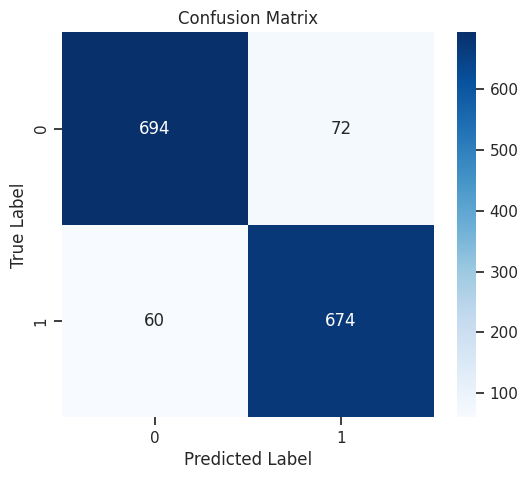

Best SVC: 
F1 Score  : 0.9108
Recall    : 0.9183
Precision : 0.9035
Accuracy  : 0.9120
AUROC     : 0.9121


In [ ]:
# Print the best parameters and score
print("Best RandomizedSearch parameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_random_model = random_search.best_estimator_
y_pred = best_random_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Best SVC: ')
best_random_svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in best_random_svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

In [ ]:
results = defaultdict(list)

results['Model'] = ['SVM', 'SVM(GridSearch)', 'SVM(RandomizedSearch)']
exp_metrics = [svm_metrics, best_grid_svm_metrics, best_random_svm_metrics]
for metrics in exp_metrics:
    for k, v in metrics.items():
        results[k].append(v)

table = pd.DataFrame(results)
table

,Model,F1 Score,Recall,Precision,Accuracy,AUROC
0,SVM,0.9036,0.9005,0.9067,0.9060,0.9059
1,SVM(GridSearch),0.9184,0.9278,0.9092,0.9193,0.9195
2,SVM(RandomizedSearch),0.9108,0.9183,0.9035,0.9120,0.9121


# 6. Baseline 모델 학습 및 평가

**Baseline models**
1. Logistic Regression
2. Decision Tree

In [ ]:
# Create Logistic Regression and Decision Tree models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train Logistic Regression and Decision Tree models on the training set
logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

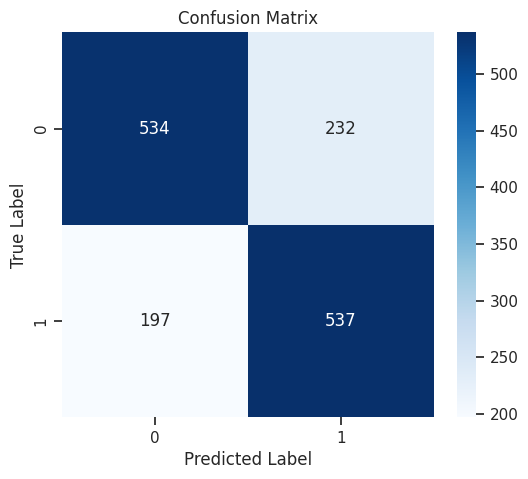

Logistic Regression:
F1 Score  : 0.7146
Recall    : 0.7316
Precision : 0.6983
Accuracy  : 0.7140
AUROC     : 0.7144


In [ ]:
# Evaluate the trained Logistic Regression and Decision Tree models on the test set

# Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred_logreg)

# Calculate and print various evaluation metrics
print('Logistic Regression:')
logreg_metrics = calc_metrics(y_true=y_test, y_pred=y_pred_logreg)
for k, v in logreg_metrics.items():
    print(f'{k:10s}: {v:.4f}')

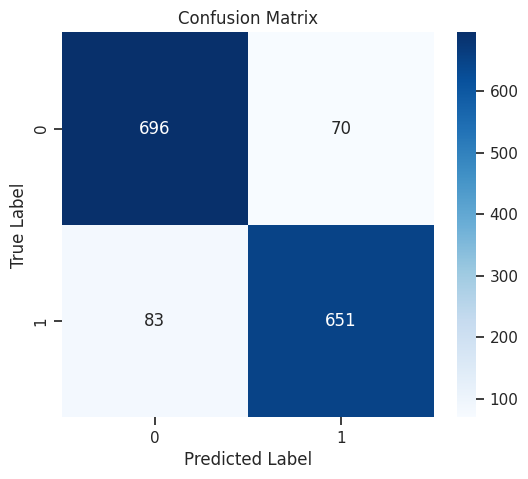

Decision Tree:
F1 Score  : 0.8948
Recall    : 0.8869
Precision : 0.9029
Accuracy  : 0.8980
AUROC     : 0.8978


In [ ]:
# Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred_dt)

# Calculate and print various evaluation metrics
print('Decision Tree:')
dt_metrics = calc_metrics(y_true=y_test, y_pred=y_pred_dt)
for k, v in dt_metrics.items():
    print(f'{k:10s}: {v:.4f}')

# 7. 성능 비교

In [ ]:
results = defaultdict(list)

results['Model'] = ['Logistic Regression', 'Decision Tree', 'SVM', 'SVM(tuned)']
exp_metrics = [logreg_metrics, dt_metrics, svm_metrics, best_grid_svm_metrics]
for metrics in exp_metrics:
    for k, v in metrics.items():
        results[k].append(v)

table = pd.DataFrame(results)
table

,Model,F1 Score,Recall,Precision,Accuracy,AUROC
0,Logistic Regression,0.7146,0.7316,0.6983,0.7140,0.7144
1,Decision Tree,0.8948,0.8869,0.9029,0.8980,0.8978
2,SVM,0.9036,0.9005,0.9067,0.9060,0.9059
3,SVM(tuned),0.9184,0.9278,0.9092,0.9193,0.9195


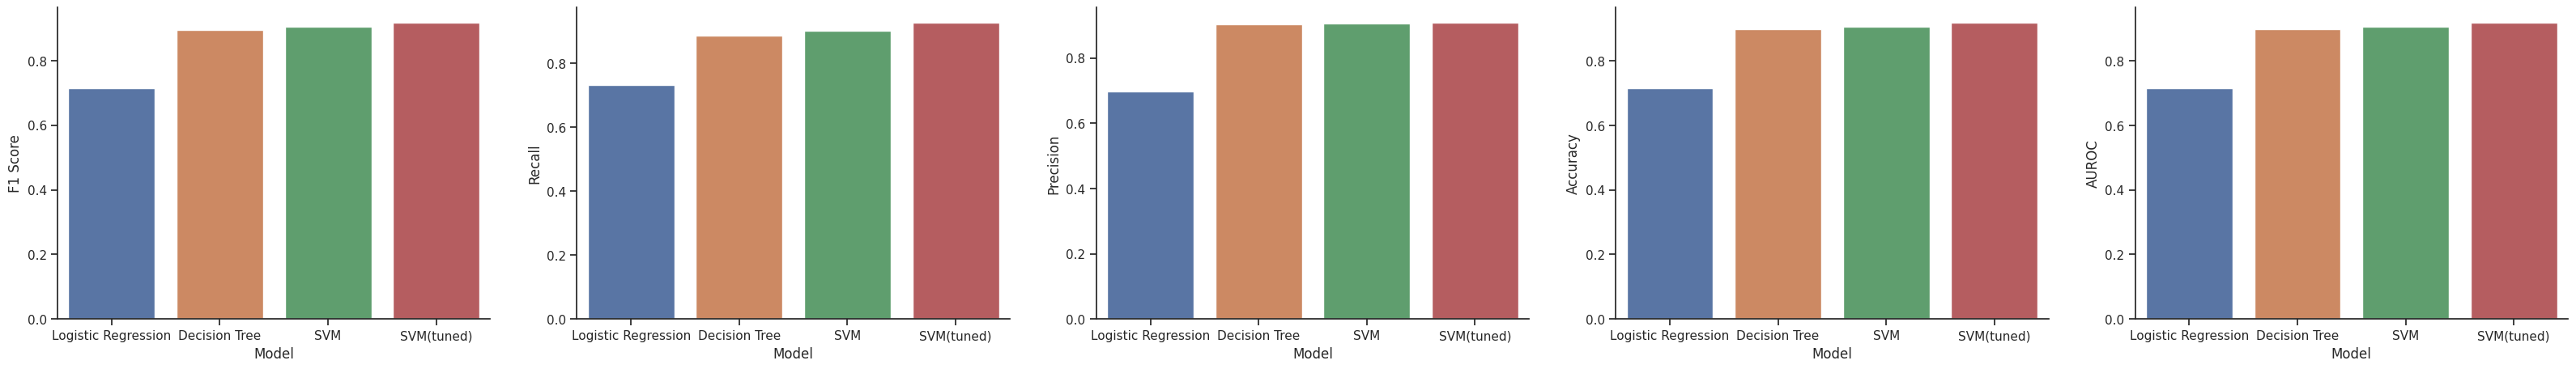

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(40,5))

for i, m in enumerate(['F1 Score', 'Recall', 'Precision', 'Accuracy', 'AUROC']):
    sns.barplot(x="Model", y=m,  hue="Model", data=table, ax=ax[i])